# Lab 6: Learning From Data

- **Instructor:** Li Zeng ([lizeng@uw.edu](mailto:lizeng@uw.edu))
- **Course:** IMT 547 SP18 - Social Media Data Mining and Analysis

### Learning Objectives:
By the end of the lab, you will be able to:
* understand how nearest neighbors work
* implement logistic regression and nearest neighbors using scikit-learn package

### Topics:
1. scikit-learn: Logistic regression
2. scikit-learn: Nearest neighbors

### References: 
 * [Scikit Learn Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 * [Scikit Learn Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html)

In [1]:
import numpy as np
import pandas as pd

# Introduce Iris dataset

In [2]:
# install the sklearn package first if needed
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
#iris

In [4]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_soe = iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Logistic Regression

In [8]:
# install the sklearn package first if needed
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Explore more:
[sklearn.linear_model.LogisticRegression()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [9]:
# Let's choose two features: sepal length and sepal width
X = iris.data[:, :2]
y = iris.target
# Make a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# create a logistic regression model
logreg = linear_model.LogisticRegression()
# fit the model to your data
logreg.fit(X_train, y_train)

C:\Users\Manas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# make predictions
print(logreg.predict([[5.5, 2.6]]), logreg.predict_proba([[5.5, 2.6]]))
print(logreg.predict([[7.1, 1.8]]), logreg.predict_proba([[7.1, 1.8]]))

[1] [[0.10049856 0.46741569 0.43208575]]
[2] [[1.14571665e-04 4.78663985e-01 5.21221444e-01]]


In [13]:
# evaluate performance
print(logreg.score(X_test, y_test))

0.78


To have a better idea of the model performance, let's plot decision boundaries:

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

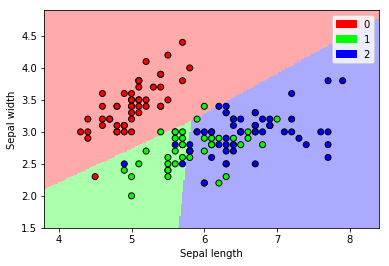

In [15]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# concatenate xx and yy
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

patch1 = mpatches.Patch(color='#FF0000', label='0')
patch2 = mpatches.Patch(color='#00FF00', label='1')
patch3 = mpatches.Patch(color='#0000FF', label='2')
ax.legend(loc = 'best', handles=[patch1, patch2, patch3])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()

# Nearest neighbors
[sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [16]:
from sklearn import neighbors
from sklearn.model_selection import KFold
# If you haven't load train_test_split
#from sklearn.model_selection import train_test_split

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Scale our data

Before we get too far ahead, let's scale our data. Let's subtract the min from each column (feature) and divide by the difference between the max and min for each column. 

Be sure to check which axis you use to take the mins/maxes!

Let's add a "\_stand" suffix to our train variable names for the standardized values

In [18]:
mins = np.min(X_train, axis = 0)
maxes = np.max(X_train, axis = 0)
diff = maxes - mins

In [26]:
diff

array([3.4, 2.2])

In [27]:
X_train_stand = (X_train - mins) / diff
X_test_stand = (X_test - mins) / diff

## K-Fold CV

Now, here's where things might get really messy. Let's implement 10-Fold Cross Validation on K-NN across a range of K values (given below - 9 total). We'll keep our K for K-fold CV constant at 10. 

Let's calculate our accuracy. Save the errors for each fold at each K value (10 folds x 9 K values = 90 values) as you loop through.

Take a look at [sklearn's K-fold CV](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html).

In [28]:
folds = KFold(len(X_train_stand))

In [30]:
for train_index, val_index in folds.split(X_train_stand):
        print(train_index)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30

In [32]:
kValues = [1, 2, 3, 4, 5, 10, 20, 40, 80]
cv_scores = {}
for k in kValues:
    currentScores = []
    for train_index, val_index in folds.split(X_train_stand):
        current_train_X, current_val_X = X_train_stand[train_index], X_train_stand[val_index]
        current_train_y, current_val_y = y_train[train_index], y_train[val_index]
        neigh = neighbors.KNeighborsClassifier(n_neighbors = k,weights='uniform')
        neigh.fit(current_train_X, current_train_y)
        scores = neigh.score(current_val_X, current_val_y)
        currentScores.append(scores)
    cv_scores[k] = currentScores

## Plot the Results of the Parameter (K) Tuning

Plot your training accuracy across all folds as a function of K. What do you see?

In [33]:
keys = sorted(cv_scores.keys())
means = []
stdevs = []
for each in keys:
    current = cv_scores[each]
    means.append(np.mean(current)) 
    stdevs.append(np.std(current))

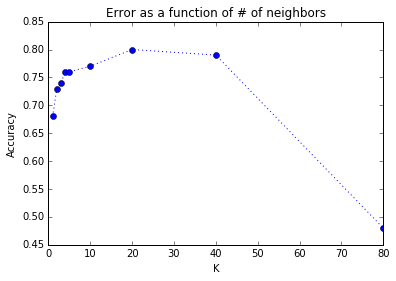

In [22]:
figure = plt.figure()
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Error as a function of # of neighbors')

Looks like 20 is a good k number!

## Test the Model

In [34]:
# create a KNN model with 20 to be the K
nneighbor = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')
nneighbor.fit(X_train_stand, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [35]:
# report the final model accuracy
print(nneighbor.score(X_test_stand, y_test))

0.72


### Exercise

Now it is your turn to explore the ML experiments. Why don't you use features related to petals this time? Use petal length and petal width as features to classify different species of Iris flowers. Choose one of your favorite ML models. If you have more time, try to analyze the performance of the trained model.

In [36]:
# Your codes here
X_petallen_width = iris.data[:, 2:]
Y_petallen_width = iris.target
# Make a train/test split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_petallen_width, Y_petallen_width, test_size=0.33, random_state=42)

In [37]:
# creating a logistic regression model
logreg_p = linear_model.LogisticRegression()
# fit the model to your data
logreg_p.fit(X_train_p, y_train_p)

C:\Users\Manas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
#evaluating performance
print(logreg_p.score(X_test_p, y_test_p))

0.8


**Our model accuracy is 80%**

In [51]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_petallen_width, Y_petallen_width, test_size=0.33, random_state=42)

In [52]:
mins = np.min(X_train_p, axis = 0)
maxes = np.max(X_train_p, axis = 0)
diff = maxes - mins

In [53]:
X_train_stand_p = (X_train_p - mins) / diff
X_test_stand_p = (X_test_p - mins) / diff

In [54]:
folds_p = KFold(len(X_train_stand_p))

In [55]:
kValues = [1, 2, 3, 4, 5, 10, 20, 40, 80]
cv_scores = {}
for k in kValues:
    currentScores = []
    for train_index, val_index in folds_p.split(X_train_stand_p):
        current_train_X, current_val_X = X_train_stand_p[train_index], X_train_stand_p[val_index]
        current_train_y, current_val_y = y_train_p[train_index], y_train_p[val_index]
        neigh = neighbors.KNeighborsClassifier(n_neighbors = k,weights='uniform')
        neigh.fit(current_train_X, current_train_y)
        scores = neigh.score(current_val_X, current_val_y)
        currentScores.append(scores)
    cv_scores[k] = currentScores

In [56]:
keys = sorted(cv_scores.keys())
means = []
stdevs = []
for each in keys:
    current = cv_scores[each]
    means.append(np.mean(current)) 
    stdevs.append(np.std(current))

Text(0.5, 1.0, 'Error as a function of # of neighbors')

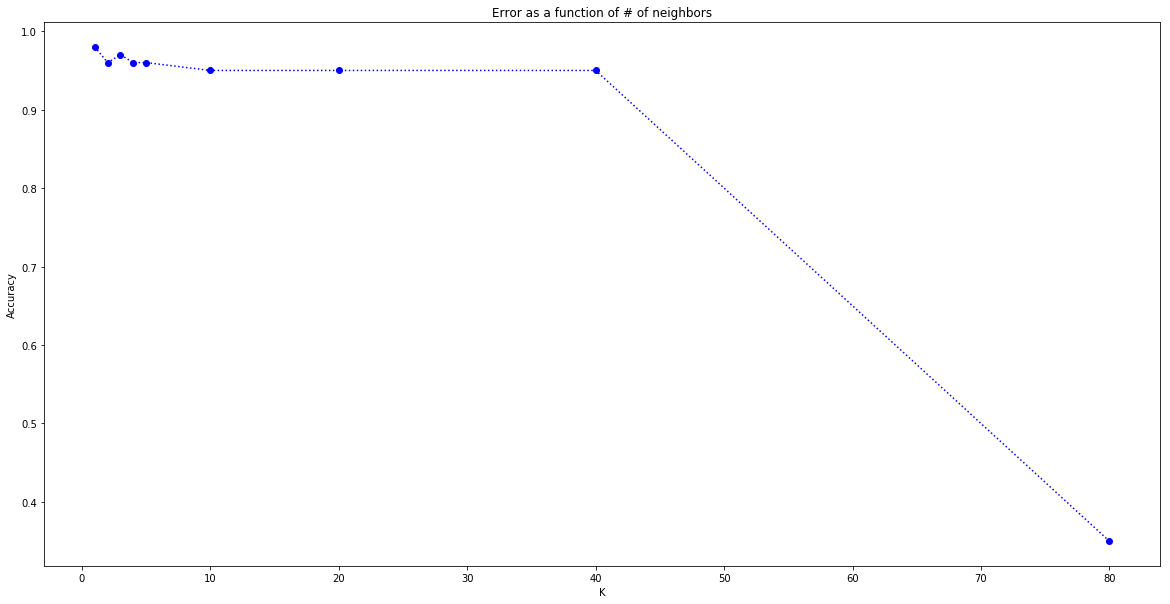

In [57]:
figure = plt.figure(figsize=(20,10))
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Error as a function of # of neighbors')

**Answer: From the graph, we see that we have many choices for K which are good, however, anyhting greater than 40 should not be chosen**